In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2025-06-24 21:32:41--  https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.66K  --.-KB/s    in 0s      

2025-06-24 21:32:41 (43.0 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4767/4767]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/9fcd

In [ ]:
try:
  from gusto import *
except ImportError:
  !pip install git+https://github.com/firedrakeproject/gusto
  from gusto import *

  Cloning https://github.com/firedrakeproject/gusto to /tmp/pip-req-build-mp9rscwo
  Running command git clone --filter=blob:none --quiet https://github.com/firedrakeproject/gusto /tmp/pip-req-build-mp9rscwo
  Resolved https://github.com/firedrakeproject/gusto to commit 07746d30da4197d6c47dc7c8498f64cf969a8a5a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.2/556.2 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gusto: filename=gusto-1.0-py3-none-any.whl size=226286 sha256=e59abf8481a4059e2e9e87c0d7fc39049c9a9885a2d46957d603e6156a5c49f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-uwi56xa8/wheels/71/35/2b/633de90faa8dd1f5bd25c0dd9777cd0183432869227379d874
  Created wheel for qmat: filename=qmat-0.1.18-py3-none-any.whl 

INFO     Running /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-853a4251-358f-48cf-856b-2a541df4ebf7.json
INFO:gusto:Running /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-853a4251-358f-48cf-856b-2a541df4ebf7.json


In [ ]:
# Import specific functions from Firedrake
from firedrake import (SpatialCoordinate, TestFunction, TrialFunction, norm,
                       Function, dx, lhs, rhs, inner, LinearVariationalProblem,
                       LinearVariationalSolver, Constant, acos, exp, trisurf,
                       tricontourf, functionspaceimpl)

In [ ]:
# Code in this cell makes plots appear an appropriate size and resolution in the browser window
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 42.2 MB/s eta 0:00:00


In [ ]:
import numpy as np

In [ ]:
from netCDF4 import Dataset

In [ ]:
!pip install git+https://github.com/tommbendall/tomplot.git

  Cloning https://github.com/tommbendall/tomplot.git to /tmp/pip-req-build-f1qx_uxb
  Running command git clone --filter=blob:none --quiet https://github.com/tommbendall/tomplot.git /tmp/pip-req-build-f1qx_uxb
  Resolved https://github.com/tommbendall/tomplot.git to commit dc7064575770c23a4c0b91823af9107c12507bff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tomplot: filename=tomplot-2.0-py3-none-any.whl size=36665 sha256=0971422ab93c82e06bcc345f764945445ffd1da59233555ee3c522356c2f2a05
  Stored in directory: /tmp/pip-ephem-wheel-cache-ii2otvwl/wheels/74/c2/62/12e82d7d9fa550afcffa91d685c6b22b210bac7b91f8600b6c
Successfully built tomplot


In [ ]:
from tomplot import *

In [ ]:
import cartopy.crs as ccrs

This next cell contains some functions to interface between Firedrake and Matplotlib and to print out the min and max values of fields (useful when debugging!).

In [ ]:
def plot_field(field):
    # function to plot the field and show the plot - could be amended
    # to save a figure instead and other plotting commands can be added
    tsurf = trisurf(field)
    plt.colorbar(tsurf)
    plt.title(field.name())
    plt.show()


def plot_field_latlon(lon, lat, field):
    # DON'T USE ME!!
    # function to plot the field and show the plot - could be amended
    # to save a figure instead and other plotting commands can be added
    # We need to regrid onto lon-lat grid -- specify that here
    lon_1d = np.linspace(-180.0, 180.0, 120)
    lat_1d = np.linspace(-90, 90, 120)
    lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d, indexing='ij')

    projection=ccrs.Robinson()
    contour_method = 'contour'

    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 1, 1, projection=projection)
    # field_data = extract_gusto_field(data_file, field_name, time_idx=time_idx)
    # coords_X, coords_Y = extract_gusto_coords(data_file, field_name)
    field_data = field.dat.data_ro[:]
    # mesh_ll = get_flat_latlon_mesh(field.function_space().mesh())
    # coords_X = mesh_ll.coordinates.dat.data[:, 0]
    # coords_Y = mesh_ll.coordinates.dat.data[:, 1]
    # x = field.function_space().mesh().coordinates.dat.data[:, 0]
    # y = field.function_space().mesh().coordinates.dat.data[:, 1]
    # z = field.function_space().mesh().coordinates.dat.data[:, 2]
    # lon, lat, _ = lonlatr_from_xyz(x, y, z)
    field_data = regrid_horizontal_slice(
        lon_2d, lat_2d, lon, lat, field_data, periodic_fix='sphere'
    )
    contours = np.linspace(field_data.min(), field_data.max(), 10)
    cmap, lines = tomplot_cmap(contours)
    cf, _ = plot_contoured_field(
        ax, lon_2d, lat_2d, field_data, contour_method, contours,
        cmap=cmap, line_contours=lines, projection=projection
    )

    add_colorbar_ax(
        ax, cf, field_label, location='bottom', cbar_labelpad=-10,
    )
    tomplot_field_title(ax, None, minmax=True, field_data=field_data)
    plt.show()


def print_minmax(field):
    # function to print the min and max of field in a nice way
    print(f"min and max of {field.name()}: {field.dat.data.min()}, {field.dat.data.max()}")


Testing if I can commit to this? FHL

We will solve the linear shallow water equations, written in terms of the 2D velocity, $\textbf{u}$, and fluid free surface, $h$, coupled to an equation for a transported moisture variable, $q$:

\begin{align}
\textbf{u}_t + f \textbf{u}^{\perp} + g \nabla h  + r\textbf{u} &= 0, \\
h_t + H\nabla \cdot \textbf{u} &= 0, \\
q_t + \nabla \cdot (q\textbf{u}) &= E-P,
\end{align}

where $f$ is the Coriolis parameter, $g$ is the gravitational acceleration, $r$ is some friction parameter, $E$ represents evaporation, $P$ represents precipitation and $H$ is the mean fluid depth, and we have assumed a flat bottom boundary. No lateral boundary conditions are required as in this case we are solving on a spherical domain. _To "harmonise" with the below, I think we need to make the above incompressible, as discussed? Set $D = H_0 = 2500$ m initially?_


**More about the moisture equation:**

I think we need to be clear about what happens to the moisture advection term converging regions, $w>0$, and diverging regions, $w<0$. Expanding,
\begin{equation}
\nabla \cdot (q\textbf{u}) = q \nabla \cdot \textbf{u} + \textbf{u} \nabla q
\end{equation}
In converging regions, we lose $q$ due to upward velocity. In diverging regions we lose $q$ due to horizontal divergence from the region, but gain $q_W$, a tropically averaged descending moisture. Given that $\nabla q_W = 0$, we only care about the velocity derivative. We write $(q - q_A) \nabla \cdot \mathbf{u}$, where $q_A = q_W$ when $w < 0$ and $q_A = 0$ when $w > 0$.

**Source and sink terms:**

Evaporation:
\begin{equation*}
E = \rho_0 C_H |u| (q_S - q),
\end{equation*}

where $q_S = 0.622 e_0\exp(-L/(R_w T_S)) / p_0 $ is the saturation specific humidity, $e_0 = 2300 \exp(L / (R_w * 293.))$, $L = 2.5 \times 10^6$ Jkg$^{-1}$ is the latent heat of condensation, $p_0 = 100000$ Pa is a reference pressure and $R_w = 416$ JK$^{-1}$kg$^{-1}$ is the specific gas constant for water vapour. $C_H = 1\times10^{-3}$ is the bulk coefficient. _This might have to be cranked up to get enough evaporation -- at least initially when we set $q_W = q_{UT}$ and ignore the air-sea temperature difference, which will tend to enhance evaporation -- see below._

Precipitation:
\begin{equation*}
P = M_B(q - q_{UT}),
\end{equation*}
where $M_B = 0.006029$ is the boundary layer overturning timescale (_not_ a convective timescale) and $q_{UT} = 0.004$ kg kg$^{-1}$ is the upper-tropospheric specific humidity, which is _fairly_ fixed. Yes I'm breaking all my own rules and not putting appropriate units on half of these.

**Vertical velocity:**

\begin{align*}
  \rho_0 C_p \Delta \theta w &= LP - Q_{cl},\\
w &= \frac{LP - Q_{cl}}{\rho_0 C_p \Delta \theta} = - H\nabla \cdot \mathbf{u},
\end{align*}
where $Q_{cl}$ is the net combined radiative-sensible cooling of the free atmosphere (cloud layer). A sensible initial value might be $Q_{cl} = 100$ Wm$^{-2}$, but it is likely to be substantially smaller in the convecting region (due to high cloud and water vapour amount) and on our planets due to the direct absorption of stellar radiation because M star's spectra are very red. $\Delta \theta$ is the change in potential temperature across the troposphere. Again, a sensible initial value to try is probably $\Delta \theta = 50$ K.

***Final rule***. Precipitation (and therefore positive $w$) occur when $q > q_C$, where $q_C$ is the critical specific humidity for the initiation of convection. A sensible initial value might be $q_C = 0.018$ kg kg$^{-1}$. A more general discussion of optimisation is in the Appendices, but this one is probably important to get roughly right. We want $\int w\, dxdy \sim 0$ in order to conserve mass. Notice that, unlike most other people's simple convective parameterisations in simple models, $q_C \ne q_{UT}$.

**DOES IT NEED SOME KIND OF DIFFUSION?** If velocity drops to zero does $\nabla q$ go to infinity? _I leave it to your expertise..._


The next cell contains physical parameters. It would be a good idea to finish commenting what they all are and what their units are!!

In [ ]:
R = 7160000.                 # radius of planet (m)
Omega = 6.501e-6             # rotation rate of planet
g = 10.9                     # gravitational acceleration (m s^-2)
H = 2500.                    # depth of atmosphere (mean fluid depth) (m)
r = 3.6e-5                   # linear coefficient of friction (N kg^-1 m^-1 s)
alpha = 500.
L = 2.5e6                    # latent heat of condensation (J kg^-1)
Rw = 416                     # specific gas constant for water vapour (J K^-1 kg^-1)
p0 = 1e5                     # reference pressure (Pa)
e0 = 2300*exp(L/(Rw*293.))
q_ut = 0.004                 # upper-tropospheric specific humidity (kg kg^-1)
mB = 0.006029                # boundary layer overturning timescale (kg m^-2 s^-1)
qW = q_ut                    # tropically averaged descending moisture
rho0 = 1                     # constant density of boundary layer air (kg m^-3)
cH = 1e-3                    # bulk coefficient (no units)
Cp = 1005.                   # specific heat capacity at constant pressure (J K^-1 kg^-1)
dtheta = 50                  # change in potential temperature across troposphere (K)
qC = 0.018                   # critical specific humidity for initiation of convection (kg kg^-1)
Qcl = 100.                   # net combined radiative-sensible cooling of free atmosphere (W m^-2)

The next cell sets up the domain and some of the finite element functions that we will use later.



First, we construct a mesh of our domain. We will use one of the spherical meshes provided by Gusto, the `GeneralCubedSphereMesh`, which generates a mesh of the sphere by transforming a mesh of a cube. As the spherical domain we are solving over is the Earth we specify the radius as 6371220m. The argument `num_cells_per_edge_of_panel`, specifies the number of cells along each edge of each face of the cube. The argument `degree` specifies the polynomial degree of the function space used to represent the coordinates; we use `degree=2` so that we can represent the curvature of the sphere.

In [ ]:
# set up mesh, timestep and use the Gusto domain function to set up
# the finite element function spaces
mesh = GeneralCubedSphereMesh(radius=R, num_cells_per_edge_of_panel=16,
                              degree=2)
dt = 100
domain = Domain(mesh, dt, family="RTCF", degree=1)

# extract function spaces from domain
Vu = domain.spaces("HDiv")
Vdg = domain.spaces("L2")
Vcg = domain.spaces("H1")

# we need the latitude and longitude coordinates later
xyz = SpatialCoordinate(mesh)
lon, lat, _ = lonlatr_from_xyz(*xyz)

# =======================================================================
# create the functions we need and name them
w = Function(Vdg, name="w")       # vertical velocity
h = Function(Vdg, name='h')       # depth perturbation
u = Function(Vu, name='u')        # velocity
q = Function(Vdg, name='q')       # moisture
qA = Function(Vdg, name='qA')     #
E = Function(Vdg, name='E')       # evaporation
P = Function(Vdg, name='P')       # precipitation

  warnings.warn("Discontinuous Lagrange element requested on %s, creating DQ element." % cell.cellname())

  warnings.warn("Discontinuous Lagrange element requested on %s, creating DQ element." % cell.cellname())

  warnings.warn("Discontinuous Lagrange element requested on %s, creating DQ element." % cell.cellname())



Now we setup functions for the Coriolis parameter, surface temperature and saturation function.

The shallow water equations contain three parameters that need to be specified: the gravitational acceleration $g$, the mean height of the fluid layer $H$ and the Coriolis parameter $f=2\Omega\sin\theta$ where $\Omega$ is the rotation rate and $\theta$ the latitude. The `ShallowWaterParameters` class has Earth-sized values as default for both $\Omega$ (`=7.292e-5`rad/s) and $g$ (`=9.80616`m/s$^2$) meaning that for this example we only need to specify $H$. We also pass the mesh to the `ShallowWaterParameters` object.

In [ ]:
# Coriolis
fexpr = 2*Omega*sin(lat)
f = Function(Vcg).interpolate(fexpr)

# fake surface temperature field: a constant Tmin plus Gaussian
# perturbation centered on (lon_c, lat_c)
lon_c = 0
lat_c = 0
Tmin = 155
Tmax = 160

def d(lon1, lat1, lon2, lat2):
    # returns distance on sphere between (lon1, lat1) and (lon2, lat2)
    return acos(sin(lat1)*sin(lat2) + cos(lat1)*cos(lat2)*cos(lon1-lon2))

Ts = Function(Vdg, name='Ts')
Ts.interpolate(Tmin + Tmax * exp(-d(lon_c, lat_c, lon, lat)**2))

# saturation function
qs = 0.622 * e0 * exp(-L/(Rw*Ts)) / p0

The next cell sets up the finite element form of the equations we are going to solve.

In [ ]:
# =======================================================================
# setup the h equation and solver
test_h = TestFunction(Vdg)
trial_h = TrialFunction(Vdg)
h0 = Function(Vdg)
h_eqn = test_h * trial_h * dx + dt * test_h * (-w + h0/alpha) * dx
h_lhs = lhs(h_eqn)
h_rhs = rhs(h_eqn)
h_prob = LinearVariationalProblem(h_lhs, h_rhs, h)
h_solver = LinearVariationalSolver(h_prob)


# =======================================================================
# setup the u equation and solver
test_u = TestFunction(Vu)
trial_u = TrialFunction(Vu)
u0 = Function(Vu)
u_eqn = inner(test_u, trial_u) * dx + dt * (
    inner(test_u, f*domain.perp(u) + r*u0) * dx - g * div(test_u) * h * dx
)
u_lhs = lhs(u_eqn)
u_rhs = rhs(u_eqn)
u_prob = LinearVariationalProblem(u_lhs, u_rhs, u)
u_solver = LinearVariationalSolver(u_prob)


# =======================================================================
# setup the q equation and solver
test_q = TestFunction(Vdg)
trial_q = TrialFunction(Vdg)
q0 = Function(Vdg)
q_eqn = test_q * trial_q * dx + dt * test_q * ((q0 - qA) * div(u) - E + P) * dx
q_lhs = lhs(q_eqn)
q_rhs = rhs(q_eqn)
q_prob = LinearVariationalProblem(q_lhs, q_rhs, q)
q_solver = LinearVariationalSolver(q_prob)

Now we define some expressions for calculating various fields - hopefully the naming is obvious: e.g. `E_expr` is the expression used to calculate the evaporation `E`.

In [ ]:
w_expr = (L * P - Qcl) / (H * rho0 * Cp * dtheta)
qA_expr = conditional(w < 0, qW, 0)
E_expr = rho0 * cH * sqrt(dot(u, u)) * (qs - q)
P_expr = conditional(q > qC, mB * (q - q_ut), 0)

Our initial conditions are that the height perturbation is zero (i.e. the depth of the atmosphere is H) and the horizontal velocity is zero. The initial water vapour is 0.7 times the saturation function. Where this is above `qC` there will be precipitation, and hence vertical velocity, so we compute `P` and then `w`.

In [ ]:
# initial water vapour, q, is 0.7 * saturation value
q.interpolate(0.7 * qs)
# compute P from initial q
P.interpolate(P_expr)
# compute initial w
w.interpolate(w_expr)

Coefficient(WithGeometry(FunctionSpace(<firedrake.mesh.MeshTopology object at 0x79754313c290>, FiniteElement('DQ', quadrilateral, 1), name='L2'), Mesh(VectorElement(FiniteElement('Q', quadrilateral, 2), dim=3), 4)), 66)

Let's plot the initial fields:

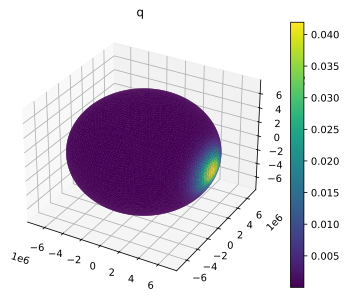

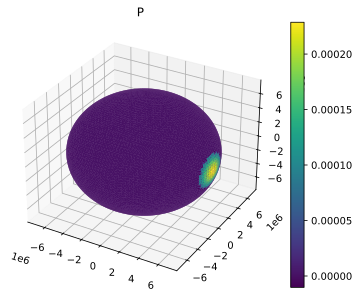

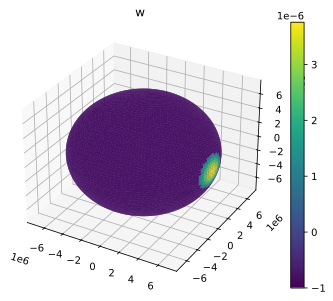

In [ ]:
plot_field(q)
plot_field(P)
plot_field(w)

In [ ]:
lon = domain.coords.chi_coords['DG1_equispaced'][1].dat.data[:]
lat = domain.coords.chi_coords['DG1_equispaced'][0].dat.data[:]
plot_field_latlon(lon, lat, q)

NameError: name 'domain' is not defined

Now we can timestep!

In [ ]:
t = 0
tmax = 100 * dt
not_steady = True   # flag to indicate that we have not yet reached a
                    # steady state
tol = 1e-3          # tolerance with which to compute steady state

# timeloop
while not_steady and t < tmax:
    t += dt
    # compute h
    h_solver.solve()
    # compute u
    u_solver.solve()
    # update functions required to compute q
    qA.interpolate(qA_expr)
    E.interpolate(E_expr)
    P.interpolate(P_expr)
    # compute q
    q_solver.solve()

    print(f"at time {t}, change in h is: {norm(h-h0)}")
    not_steady = norm(h-h0) > tol

    # update fields
    h0.assign(h)
    u0.assign(u)
    q0.assign(q)

Now let's plot the final fields.

In [ ]:
plot_field(q)
plot_field(P)
plot_field(w)

**Appendices**

***Aside: Why $\rho_0 C_p \Delta \theta w$?***

The heating terms $LP$ and $Q$ are column-integrated over the troposphere and are therefore balanced by column integrated ascent:
\begin{equation*}
\rho_0 C_p \int_{trop} w(z) \frac{d\theta}{dz} dz \sim \rho_0 C_p \Delta \theta \bar{w},
\end{equation*}
where $\bar{w}$ is column-mean $w$ and the overbar is subsequently omitted because all equations are column-mean.


**Doing a better job**

Some quantities that I recommend prescribing to begin with can actually be calculated.


***Tropospheric potential temperature difference***

Initially we set $\Delta \theta = 50$ K, but we can calculate it. Set
\begin{equation}
\Delta \theta = \frac{L}{C_p}(q_{max} - q_{UT}),
\end{equation}
where $q_{max}$ is the largest value of $q$, which is assumed to establish the tropical moist adiabatic lapse rate (as per some Isaac Held paper I can't remember currently).


***Sensible heat flux***

We want to avoid having a prognostic equation for boundary layer temperatures (this is what Bob is interested in in his papers), but if we had an estimate of boundary layer temperature then we can estimate the air-sea temperature difference, which is important to evaporation. The sensible heat flux, $J$, is
\begin{equation}
J = \rho_0 C_H C_p |u| (T_S - T_{skin}),
\end{equation}
where $T_{skin}$ is the skin temperature of the ocean (rather than $T_S$ which is really "near surface temperature", which would be measured by weather stations and would correspond to our $\theta$ at the surface.
Note that we assume that $C_H$ is the same as for evaporation, which is not always done. You then rearrange this expression to provide a value of the air-sea temperature difference.


**Optimisation**

We want
- $\int w\, dxdy = 0$. This is achieved by changing $q_C$. This also guarantees that net free atmospheric $LP$ and $Q_{cl}$ are balanced.
- To conserve moisture, $\int_{ascent} q w\, dxdy - P = \int_{descent} q_W w \,dxdy$. Then iterate. NEED TO CHECK CALCULATION IN MY OWN CODE.
- $\Delta \theta = \frac{L}{C_p}(q_{max} - q_{UT})$. Just calculate once you have an estimate of $q_{max}$. Then iterate.
- $Q_{cl}$ and the air-sea temperature difference to be correct. I've been using an offline radiation code to calculate free tropospheric (cloud layer) and boundary layer radiative cooling. Boundary layer radiative cooling and $J$ are then forced to balance by the above sensible heat flux equation setting $T_S - T_{skin}$. Free tropopsheric radiative cooling balances $LP$ through the model equations. Then iterate. Fixing this and the moisture conservation should alleviate the need for large evaporation coefficients.
